## Analysing Customer Data of British Airways

In [ ]:
# Importing necessary libraries

import warnings
warnings.filterwarnings('ignore')
import string
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BA_reviews.csv to BA_reviews (3).csv


In [ ]:
import io
BA_reviews = pd.read_csv(io.BytesIO(uploaded['BA_reviews.csv']))


In [ ]:
BA_reviews

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Old A320 with narrow pitch....
1,1,✅ Trip Verified | Another BA Shambles. Starte...
2,2,Not Verified | BA cancelled my flight home to...
3,3,"Not Verified | BA cancelled my flight home, t..."
4,4,✅ Trip Verified | Turned up 3.5 hours in advan...
...,...,...
995,995,✅ Trip Verified | Heathrow to Keflavik. I had...
996,996,✅ Trip Verified | London to Muscat first clas...
997,997,✅ Trip Verified | My family and I travelled f...
998,998,✅ Trip Verified | Gatwick to Madeira. The fli...


In [ ]:
# We are analysing the data of Not Verified customers. So we can remove all the Verified trips from the dataset.

BA_reviews = BA_reviews[~BA_reviews.apply(lambda row: row.str.contains('Trip Verified').any(), axis=1)]


In [ ]:
BA_reviews

,Unnamed: 0,reviews
2,2,Not Verified | BA cancelled my flight home to...
3,3,"Not Verified | BA cancelled my flight home, t..."
5,5,Not Verified | Boarding – at gate at LGW they...
9,9,Not Verified | Seat horribly narrow; 3-4-3 on...
24,24,Not Verified | Worst experience ever. Outbound...
...,...,...
839,839,Not Verified | Glasgow to Miami via London. G...
848,848,Not Verified | London Heathrow to Düsseldorf....
916,916,Not Verified | Los Angeles to London. I booke...
917,917,Not Verified | The overall flight wasn't too ...


In [ ]:
BA_reviews.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [ ]:
# Certain words are of no importance while visualising. So we can remove all those words from the dataset. 

BA_reviews['reviews'] = BA_reviews['reviews'].str.replace('Not Verified|flight', '', case = False)


In [ ]:
# Reseting the sl. no because majority of the data are deleted.

BA_reviews = BA_reviews.reset_index(drop=True)
BA_reviews

,Unnamed: 0,reviews
0,2,| BA cancelled my home to Heathrow on Dec 1...
1,3,"| BA cancelled my home, the last of the da..."
2,5,| Boarding – at gate at LGW they called Grou...
3,9,| Seat horribly narrow; 3-4-3 on a 777. Than...
4,24,| Worst experience ever. Outbound was cancel...
...,...,...
160,839,| Glasgow to Miami via London. Glasgow to He...
161,848,| London Heathrow to Düsseldorf. Really good...
162,916,"| Los Angeles to London. I booked with AA, L..."
163,917,| The overall wasn't too bad. Seats and eve...


In [ ]:
# We don't want the Unnamed: 0 column. So we can remove that column

BA_reviews = BA_reviews.drop('Unnamed: 0', axis=1)

In [ ]:
BA_reviews

,reviews
0,| BA cancelled my home to Heathrow on Dec 1...
1,"| BA cancelled my home, the last of the da..."
2,| Boarding – at gate at LGW they called Grou...
3,| Seat horribly narrow; 3-4-3 on a 777. Than...
4,| Worst experience ever. Outbound was cancel...
...,...
160,| Glasgow to Miami via London. Glasgow to He...
161,| London Heathrow to Düsseldorf. Really good...
162,"| Los Angeles to London. I booked with AA, L..."
163,| The overall wasn't too bad. Seats and eve...


In [ ]:
# converting all alphabets to lower case

BA_reviews['reviews'] = BA_reviews['reviews'].str.lower()
BA_reviews.head()


,reviews
0,| ba cancelled my home to heathrow on dec 1...
1,"| ba cancelled my home, the last of the da..."
2,| boarding – at gate at lgw they called grou...
3,| seat horribly narrow; 3-4-3 on a 777. than...
4,| worst experience ever. outbound was cancel...


In [ ]:
# remove special characters, numbers and punctuations

BA_reviews['reviews'] = BA_reviews['reviews'].str.replace("[^a-zA-Z#]", " ")
BA_reviews.head()

,reviews
0,ba cancelled my home to heathrow on dec ...
1,ba cancelled my home the last of the da...
2,boarding at gate at lgw they called grou...
3,seat horribly narrow on a than...
4,worst experience ever outbound was cancel...


In [ ]:
# removing all short words. ie. we are removing all words that has word count less than 3. 

BA_reviews['reviews'] = BA_reviews['reviews'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
BA_reviews.head()

,reviews
0,cancelled home heathrow face that sensible wea...
1,cancelled home last into heathrow tried push o...
2,boarding gate they called group board were wor...
3,seat horribly narrow thankfully only quarter f...
4,worst experience ever outbound cancelled notif...


In [ ]:
# Removing all stop words from the text

stop_words = nltk.corpus.stopwords.words('english')

# Remove the stop words from the 'column_name' column
BA_reviews['reviews'] = BA_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

BA_reviews['reviews'].head()

0    cancelled home heathrow face sensible weather ...
1    cancelled home last heathrow tried push onto a...
2    boarding gate called group board world travell...
3    seat horribly narrow thankfully quarter full a...
4    worst experience ever outbound cancelled notif...
Name: reviews, dtype: object

In [ ]:
# Individual words considered as tokens. ie. splitting the sentence into indivitual words.

BA_reviews['reviews'] = BA_reviews['reviews'].apply(lambda x: x.split())
BA_reviews['reviews'].head()

0    [cancelled, home, heathrow, face, sensible, we...
1    [cancelled, home, last, heathrow, tried, push,...
2    [boarding, gate, called, group, board, world, ...
3    [seat, horribly, narrow, thankfully, quarter, ...
4    [worst, experience, ever, outbound, cancelled,...
Name: reviews, dtype: object

In [ ]:
# Stemming involves reducing words to their base form.

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

BA_reviews['reviews'] = BA_reviews['reviews'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])

BA_reviews.head()

,reviews
0,"[cancel, home, heathrow, face, sensibl, weathe..."
1,"[cancel, home, last, heathrow, tri, push, onto..."
2,"[board, gate, call, group, board, world, trave..."
3,"[seat, horribl, narrow, thank, quarter, full, ..."
4,"[worst, experi, ever, outbound, cancel, notifi..."


In [ ]:
# Lemmatisation reduce the words by changing them properly with the use of a vocabulary and morphological analysis of words.

from nltk.stem import WordNetLemmatizer

def lemmatize_text(reviews):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in str(reviews).split()])
    return lemmatized_text

BA_reviews['reviews'] = BA_reviews['reviews'].apply(lemmatize_text)


In [ ]:
BA_reviews

,reviews
0,"['cancel', 'home', 'heathrow', 'face', 'sensib..."
1,"['cancel', 'home', 'last', 'heathrow', 'tri', ..."
2,"['board', 'gate', 'call', 'group', 'board', 'w..."
3,"['seat', 'horribl', 'narrow', 'thank', 'quarte..."
4,"['worst', 'experi', 'ever', 'outbound', 'cance..."
...,...
160,"['glasgow', 'miami', 'london', 'glasgow', 'hea..."
161,"['london', 'heathrow', 'sseldorf', 'realli', '..."
162,"['angel', 'london', 'book', 'round', 'trip', '..."
163,"['overal', 'seat', 'everyth', 'comfi', 'enough..."


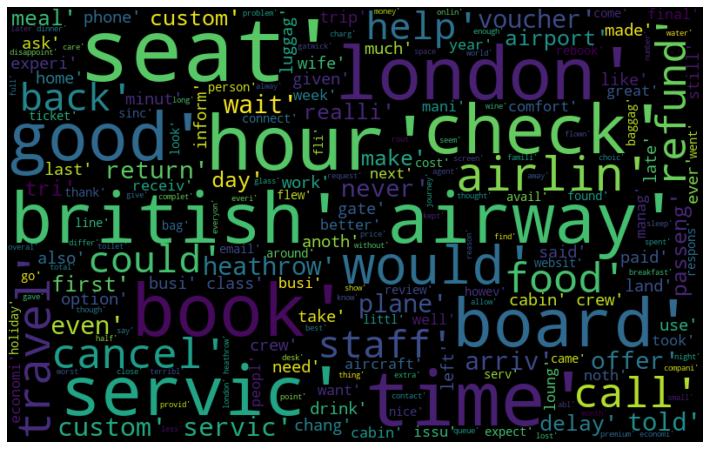

In [ ]:
# Creating a word cloud to visualise the frequent words.

all_words = " ".join(str(sentence) for sentence in BA_reviews.apply(lambda row: row['reviews'], axis=1))

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)



# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()